In [107]:
import pandas as pd 
import optuna
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
from colorama import Fore, Style, init;
# Import necessary libraries
from IPython.display import display, HTML
from scipy.stats import skew  # Import the skew function
# Import Plotly.go
import plotly.graph_objects as go
# import Subplots
from plotly.subplots import make_subplots
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Model Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler , StandardScaler , QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from sklearn.metrics import *
# Classifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

import warnings 
warnings.filterwarnings("ignore")
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [41]:
#Loading Data
#Data 
table_d = pd.read_csv('onlinefoods.csv')

# Dropped Unnamed: 12
table_d.drop('Unnamed: 12',axis = 1 , inplace = True)

print("The Head Of Dataset is:")
table_d.head()

The Head Of Dataset is:


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [42]:
print("The Shape Of Dataset is:")
table_d.shape

The Shape Of Dataset is:


(388, 12)

In [43]:
print("The Info Of Dataset is:")
table_d.info()

The Info Of Dataset is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [44]:
print("The Percent Missing Of Dataset is:")
percent_missing = round(100*(table_d.isnull().sum())/len(table_d), 2)
percent_missing

The Percent Missing Of Dataset is:


Age                           0.0
Gender                        0.0
Marital Status                0.0
Occupation                    0.0
Monthly Income                0.0
Educational Qualifications    0.0
Family size                   0.0
latitude                      0.0
longitude                     0.0
Pin code                      0.0
Output                        0.0
Feedback                      0.0
dtype: float64

In [45]:
print("The Numerical Summary Of Dataset is:")
table_d.describe()

The Numerical Summary Of Dataset is:


,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [46]:
print("The Null Values Of Dataset is:")
table_d.isnull().sum()

The Null Values Of Dataset is:


Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64

In [47]:
print("The Duplivate Values Of Dataset is:")
table_d.duplicated().sum()

The Duplivate Values Of Dataset is:


103

In [48]:
# Drop Duplicates 
table_d.drop_duplicates(inplace=True)

print("The Duplivate Values Of Dataset after drop is:")
table_d.duplicated().sum()

The Duplivate Values Of Dataset after drop is:


0

In [54]:
def single_plot_distribution(column, data):
    print("Count of each category in", column, ":")
    print(data[column].value_counts())
    
    # Plot distribution chart
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data, palette='viridis')
    plt.title('Count of ' + column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Plot pie chart
    plt.subplot(1, 2, 2)
    data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='viridis')
    plt.title('Distribution of ' + column)
    plt.ylabel('')  # Remove y-label
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

Count of each category in Age :
Age
23    47
25    41
22    40
24    37
26    27
21    18
27    16
28    12
32    12
30     8
20     7
31     7
29     7
19     4
18     1
33     1
Name: count, dtype: int64


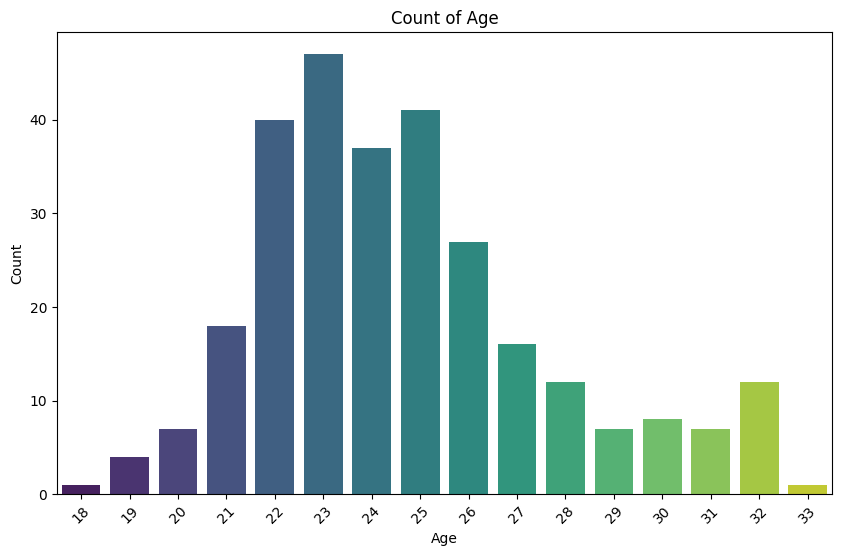

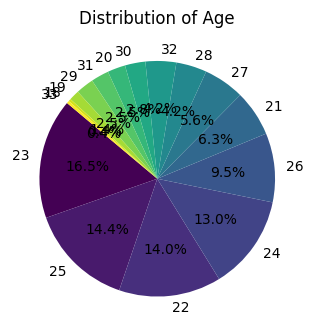

In [76]:
single_plot_distribution('Age',table_d)

Count of each category in Gender :
Gender
Male      164
Female    121
Name: count, dtype: int64


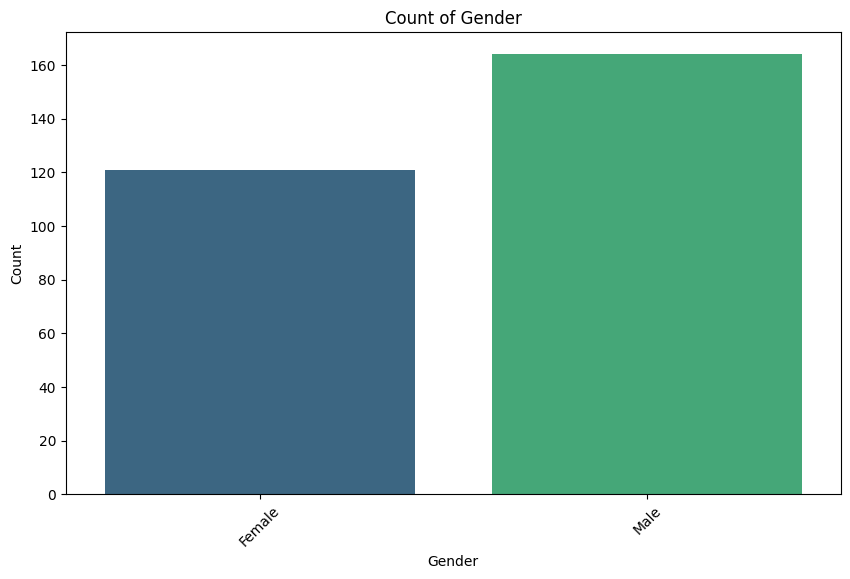

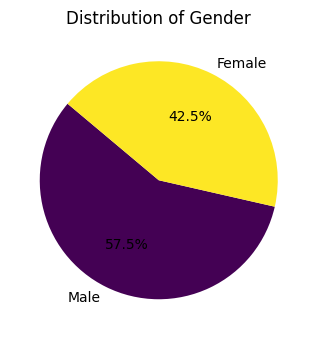

In [77]:
single_plot_distribution('Gender',table_d)

Count of each category in Marital Status :
Marital Status
Single               189
Married               87
Prefer not to say      9
Name: count, dtype: int64


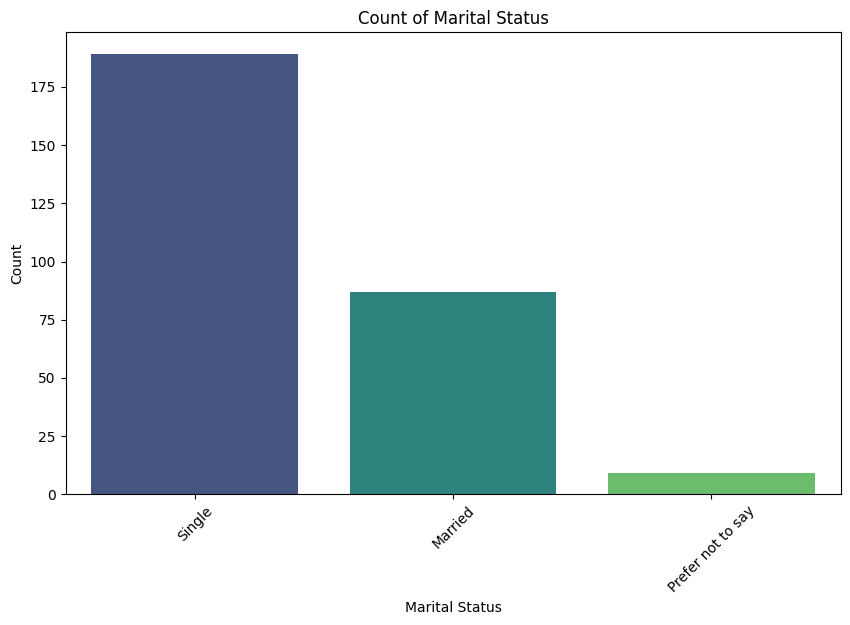

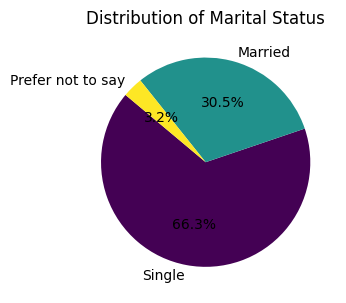

In [78]:
single_plot_distribution('Marital Status',table_d)

Count of each category in Occupation :
Occupation
Student           144
Employee           94
Self Employeed     38
House wife          9
Name: count, dtype: int64


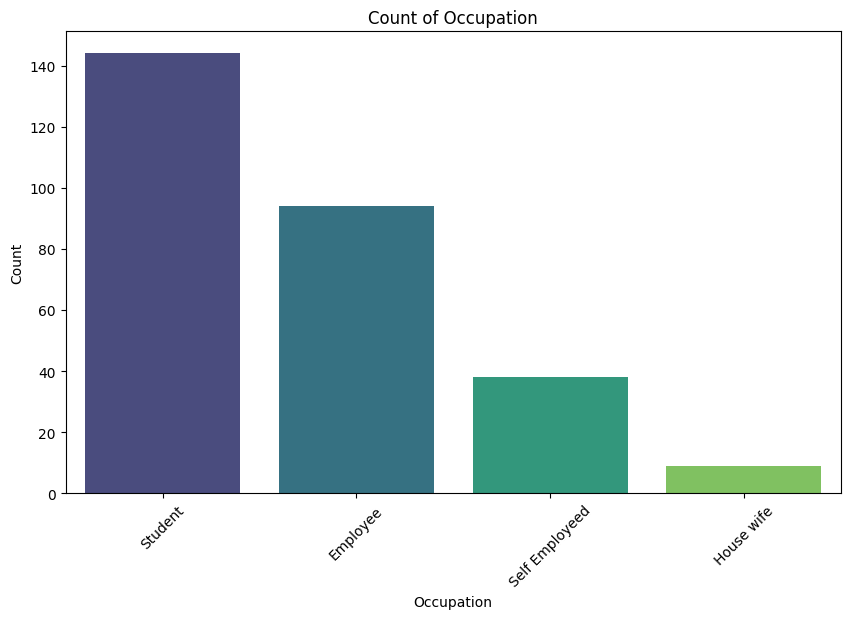

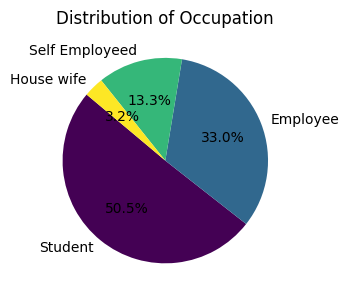

In [79]:
single_plot_distribution('Occupation',table_d)

Count of each category in Monthly Income :
Monthly Income
No Income          131
25001 to 50000      52
More than 50000     47
10001 to 25000      36
Below Rs.10000      19
Name: count, dtype: int64


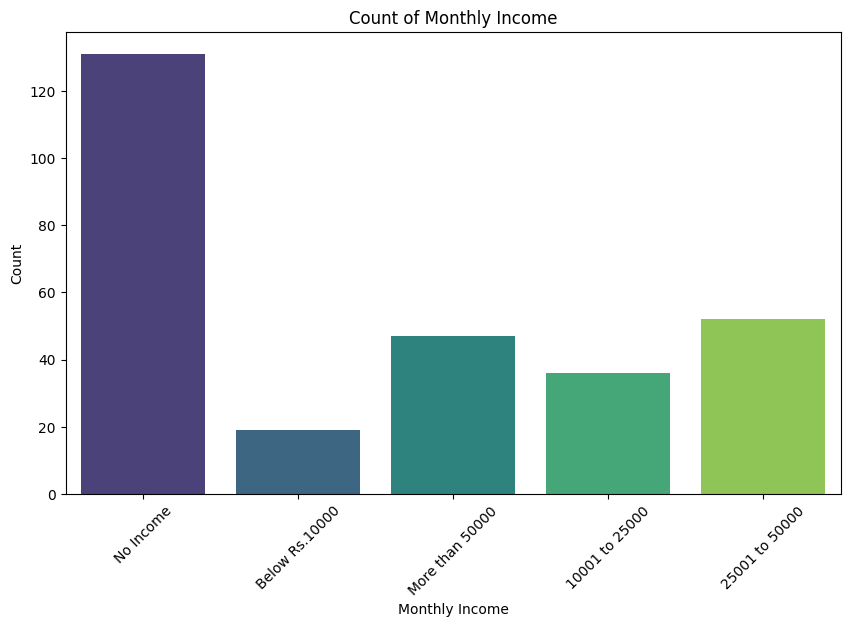

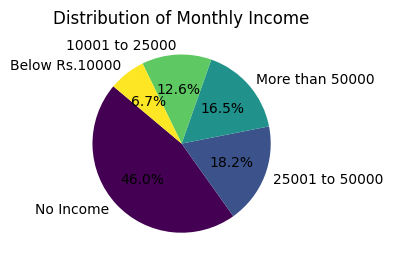

In [80]:
single_plot_distribution('Monthly Income',table_d)

Count of each category in Educational Qualifications :
Educational Qualifications
Graduate         126
Post Graduate    125
Ph.D              21
School            11
Uneducated         2
Name: count, dtype: int64


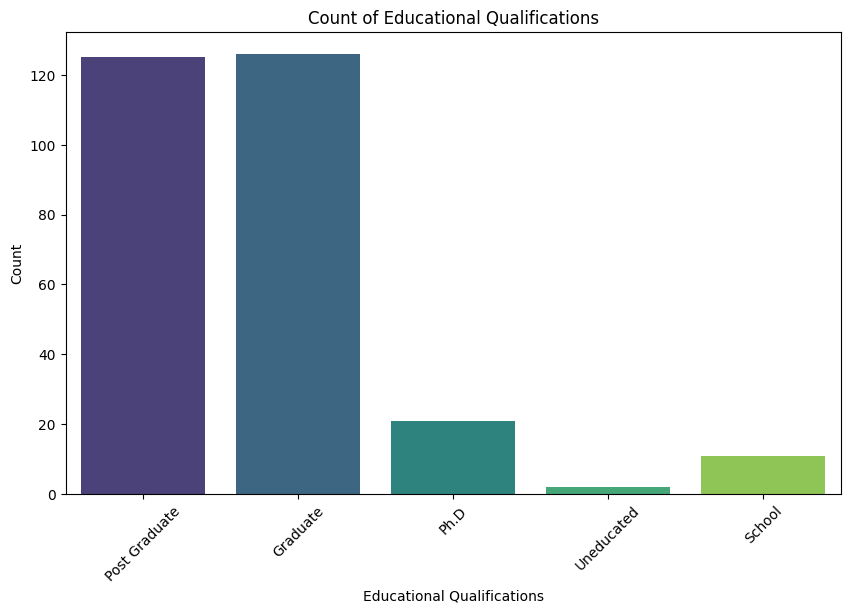

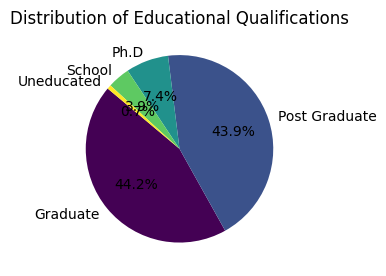

In [81]:
single_plot_distribution('Educational Qualifications',table_d)

Count of each category in Family size :
Family size
3    87
2    75
4    45
5    37
6    23
1    18
Name: count, dtype: int64


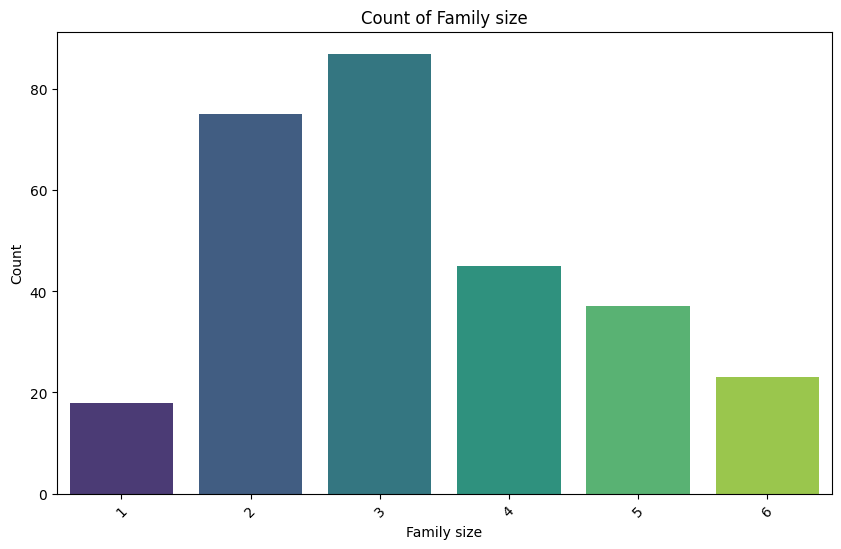

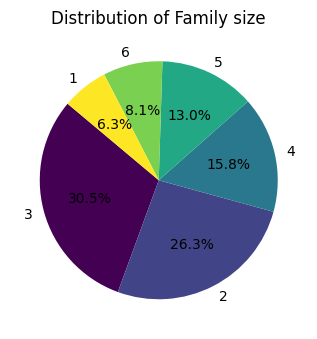

In [82]:
single_plot_distribution('Family size',table_d)

Count of each category in Output :
Output
Yes    217
No      68
Name: count, dtype: int64


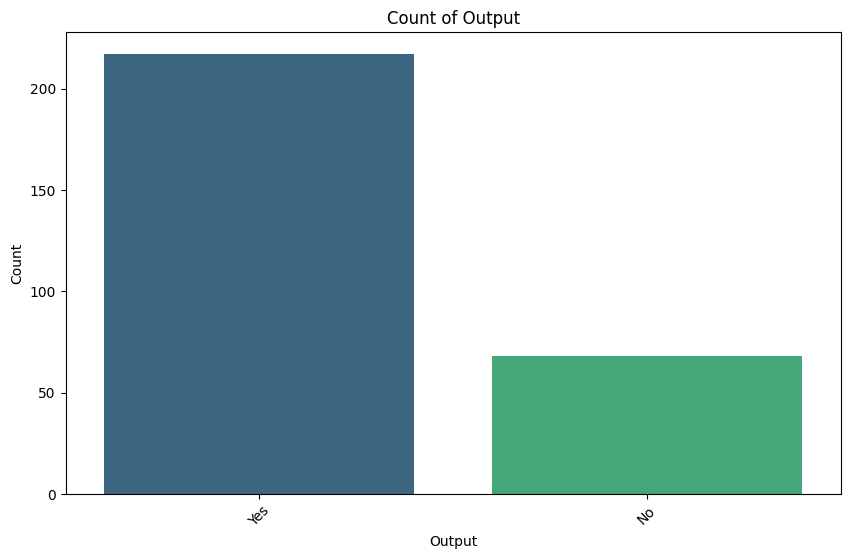

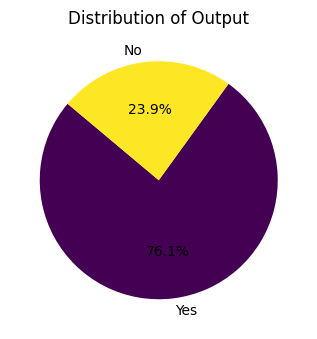

In [83]:
single_plot_distribution('Output',table_d)

Count of each category in Feedback :
Feedback
Positive     231
Negative      54
Name: count, dtype: int64


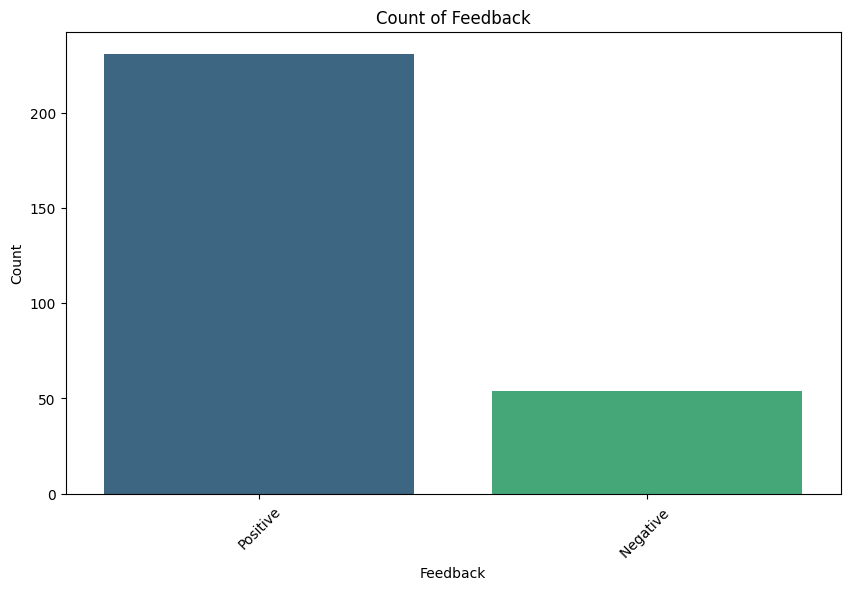

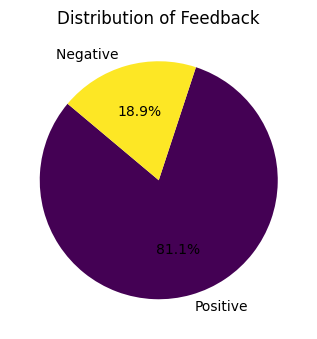

In [84]:
single_plot_distribution('Feedback',table_d)

In [102]:
#Principal Component Analysis
print("------Principal Component Analysis------")
pca_d = table_d
pca_d['Feedback'] = pca_d['Feedback'].replace({'Positive': 1, 'Negative ': 0})
pca_d['Monthly Income'] = pca_d['Monthly Income'].replace({'No Income': 0, 'Below Rs.10000': 5000, '10001 to 25000': 17500, '25001 to 50000': 37500, 'More than 50000': 50000})

------Principal Component Analysis------


Explained Variance Ratio:
[0.28089171 0.20744455 0.15488072 0.14452184 0.13765518 0.07460599]


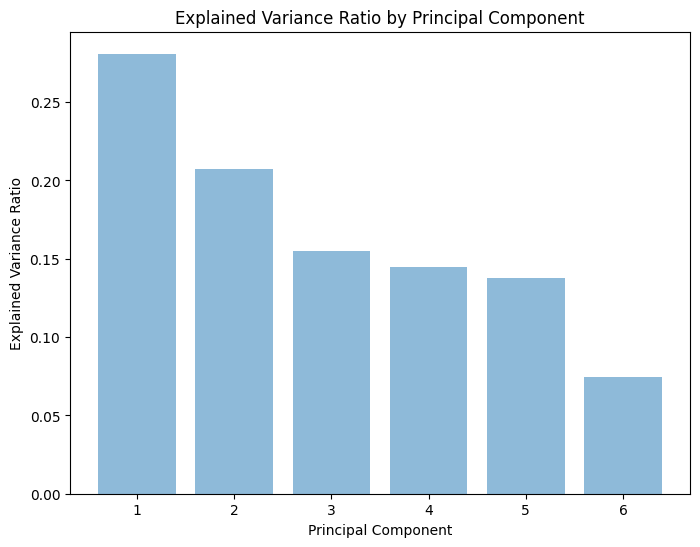

Component Loadings:
        Age  Monthly Income  Family size  latitude  longitude  Feedback
0  0.652000        0.620153     0.315114  0.019657   0.121260 -0.275533
1  0.053865       -0.061106    -0.196686  0.613145  -0.607090 -0.458447
2 -0.054068       -0.318393     0.895883 -0.002798  -0.301437  0.047157
3 -0.133737       -0.105685    -0.050727 -0.667456  -0.120489 -0.712991
4 -0.199011       -0.229146     0.170335  0.415650   0.709737 -0.449867
5  0.715248       -0.668300    -0.166805 -0.073456   0.087345  0.030772


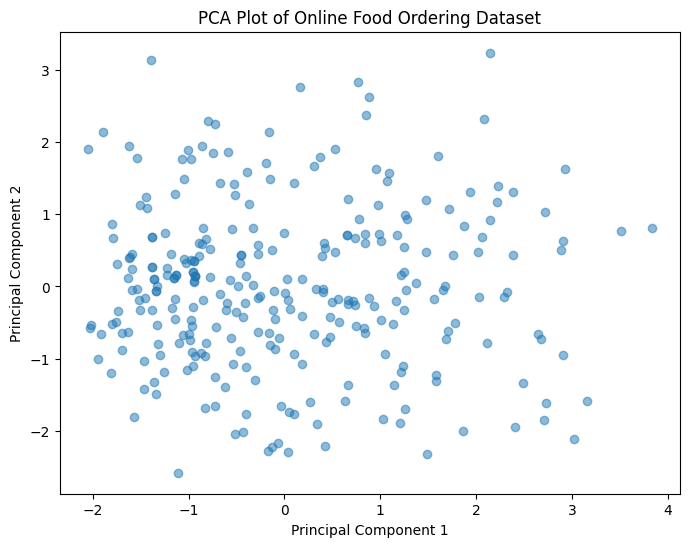

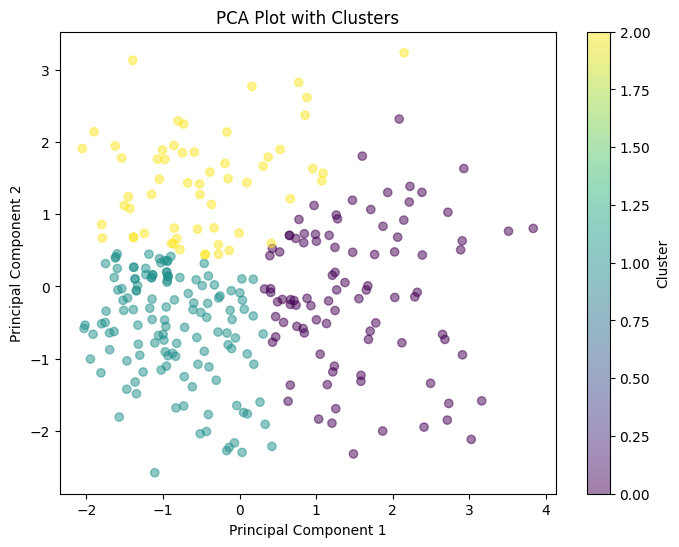

In [108]:
variables = ['Age', 'Monthly Income', 'Family size', 'latitude', 'longitude', 'Feedback']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_d[variables])

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# Interpretation: Component Loadings
component_loadings = pd.DataFrame(pca.components_, columns=variables)
print("Component Loadings:")
print(component_loadings)

# Perform PCA with 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Visualize PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of Online Food Ordering Dataset')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(pca_data)

# Visualize clustered data
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Clusters')
plt.colorbar(label='Cluster')
plt.show()
